## Importing the necessary libraries.

In [1]:
# Import required libraries necessary for creating a pytorch model and making necessary predictions
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision

# Import library require for visualizing the amout of time it takes for a pytorch and mdf model to make a prediction
import matplotlib.pyplot as plt
import time

# Import packages needed for MDF model
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf
from modeci_mdf.execution_engine import EvaluableGraph

## Dowloading and preparing the datasets.

In [2]:
# Define a data transformation pipeline for the dataset
# Compose transforms.ToTensor() and transforms.Normalize() to convert images to tensors and normalize pixel values.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training dataset (MNIST) with the specified transformations
# root: The directory to save or load the dataset. Here, '.' represents the current directory.
# train=True: Specifies to load the training split of the dataset.
# download=True: Downloads the dataset if it is not already present in the specified root directory.
# transform: Apply the transformation defined in the 'transform' variable to the dataset.
trainset = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)

# Create a DataLoader to efficiently load the training dataset in batches during training
# batch_size=10: Specifies the number of samples per batch during training.
# shuffle=True: Shuffles the order of samples in each epoch to introduce randomness.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)

# Load the testing dataset (MNIST) with the same transformations used for training
# train=False: Specifies to load the testing (validation) split of the dataset.
testset = torchvision.datasets.MNIST(root='.', train=False, download=True, transform=transform)

# Create a DataLoader for the testing dataset to efficiently load it in batches during evaluation
# shuffle=False: Since testing does not require shuffling, we set shuffle to False.
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)

## Defining our model and it foward pass.

In [3]:
class SimpleModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Define the layers of the model in the constructor (__init__)
        # Input layer (fc1): Fully connected layer with 784 input neurons (28*28) and 80 output neurons.
        self.fc1 = nn.Linear(28 * 28, 80)
        
        # Hidden layer 1 (fc2): Fully connected layer with 80 input neurons and 40 output neurons.
        self.fc2 = nn.Linear(80, 40)
        
        # Hidden layer 2 (fc3): Fully connected layer with 40 input neurons and 20 output neurons.
        self.fc3 = nn.Linear(40, 20)
        
        # Output layer (fc4): Fully connected layer with 20 input neurons and 10 output neurons (number of classes).
        self.fc4 = nn.Linear(20, 10)

    def forward(self, x):
        # The forward function defines the forward pass of the model.
        
        # Flatten the input tensor to shape (batch_size, 28*28)
        x = x.view(-1, 1*28*28)
        
        # Apply ReLU activation to the output of the first fully connected layer (fc1).
        x = torch.relu(self.fc1(x))
        
        # Apply ReLU activation to the output of the second fully connected layer (fc2).
        x = torch.relu(self.fc2(x))
        
        # Apply ReLU activation to the output of the third fully connected layer (fc3).
        x = torch.relu(self.fc3(x))
        
        # Apply ReLU activation to the output of the fourth fully connected layer (fc4).
        x = torch.relu(self.fc4(x))
        
        return x

## Instantiating our model.

In [4]:
# Create an instance of the SimpleModel class
model = SimpleModel()

## Training and evaluating the model.

In [5]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train_model(model, criterion, optimizer, num_epochs=5):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if i % 200 == 199:  # Print every 200 mini-batches
                print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 200:.3f}")
                running_loss = 0.0

    print("Training finished!")

# Training the model (you can adjust the number of epochs as needed)
train_model(model, criterion, optimizer, num_epochs=5)

# Making predictions using the trained model
def test_model(model):
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

# Test the model on the test set
test_model(model)


[Epoch 1, Batch 200] Loss: 1.963
[Epoch 1, Batch 400] Loss: 1.422
[Epoch 1, Batch 600] Loss: 1.081
[Epoch 1, Batch 800] Loss: 0.980
[Epoch 1, Batch 1000] Loss: 0.767
[Epoch 1, Batch 1200] Loss: 0.674
[Epoch 1, Batch 1400] Loss: 0.585
[Epoch 1, Batch 1600] Loss: 0.436
[Epoch 1, Batch 1800] Loss: 0.388
[Epoch 1, Batch 2000] Loss: 0.364
[Epoch 1, Batch 2200] Loss: 0.353
[Epoch 1, Batch 2400] Loss: 0.379
[Epoch 1, Batch 2600] Loss: 0.319
[Epoch 1, Batch 2800] Loss: 0.351
[Epoch 1, Batch 3000] Loss: 0.304
[Epoch 1, Batch 3200] Loss: 0.341
[Epoch 1, Batch 3400] Loss: 0.349
[Epoch 1, Batch 3600] Loss: 0.357
[Epoch 1, Batch 3800] Loss: 0.323
[Epoch 1, Batch 4000] Loss: 0.296
[Epoch 1, Batch 4200] Loss: 0.299
[Epoch 1, Batch 4400] Loss: 0.264
[Epoch 1, Batch 4600] Loss: 0.271
[Epoch 1, Batch 4800] Loss: 0.280
[Epoch 1, Batch 5000] Loss: 0.276
[Epoch 1, Batch 5200] Loss: 0.259
[Epoch 1, Batch 5400] Loss: 0.268
[Epoch 1, Batch 5600] Loss: 0.267
[Epoch 1, Batch 5800] Loss: 0.296
[Epoch 1, Batch 60

## Putting the model in evaluation mode.

In [14]:
# Put the model into evaluation mode
model.eval()

SimpleModel(
  (fc1): Linear(in_features=784, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=10, bias=True)
)

## Visualizing the test dataset.

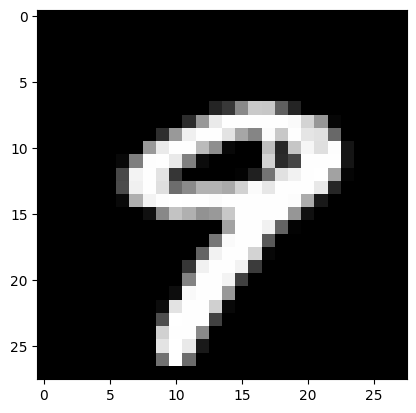

In [61]:
# Get the 10th image from the test dataset
test_img = testset.data[9] / 255
plt.imshow(test_img, cmap='gray')
plt.show()

## Making prediction with the pytorch model and timing the time to make prediction.

In [43]:
# Record the start time before making the prediction
start_time = time.time()

# Disable gradient calculation for faster inference (no need to compute gradients during prediction)
# 'torch.no_grad()' is a context manager that temporarily disables gradient calculation.
with torch.no_grad():
    # Make a prediction on the test image using the pre-trained model
    pred = model(test_img)

# Get the predicted class index with the highest probability
# 'argmax()' returns the index of the maximum value along the specified dimension (axis).
prediction = pred.argmax()

# Print the predicted number
print("The predicted number is : {}".format(prediction.item()))
end_time = time.time()

# Calculate the time taken to make the prediction
pytorch_total_time = end_time - start_time

# Print the time taken for the prediction
print("The time taken to make a prediction is: {:.4f}".format(pytorch_total_time))

The predicted number is : 9
The time taken to make a prediction is: 0.0080


## Converting the pytorch model to MDF.

In [28]:
from modeci_mdf.interfaces.pytorch import pytorch_to_mdf
from modeci_mdf.execution_engine import EvaluableGraph

# Convert the PyTorch model to an MDF model and extract parameters
# 'model': The pre-trained PyTorch model that you want to convert to MDF.
# 'args': The input tensor (test_img) to the model, used for tracing the execution graph.
# 'trace=True': Flag to enable tracing, which captures the execution graph of the model.
# Tracing is necessary to generate the execution graph in the MDF model.
mdf_model, params_dict = pytorch_to_mdf(
        model=model,
        args=test_img,
        trace=True,
    )

## Making prediction with the MDF converted pytorch model and timing the time to make prediction.

In [58]:
# Get the first graph (there may be multiple) from the MDF model
mdf_graph = mdf_model.graphs[0]

# Record the start time before making the prediction using MDF
start_time = time.time()

# Create an EvaluableGraph from the MDF graph
eg = EvaluableGraph(graph=mdf_graph, verbose=False)

# Convert the PyTorch tensor 'test_img' to a NumPy array and set it as input to the MDF graph
params_dict['input1'] = test_img.detach().numpy()

# Evaluate the MDF graph with the provided input
# 'initializer=params_dict' specifies the values of the input nodes in the MDF graph.
eg.evaluate(initializer=params_dict)

# Get the output of the MDF graph
mdf_pred = eg.output_enodes[0].get_output()

print("\n")
print("=" * 80)

# Record the end time after making the prediction using MDF
print("The predicted number is: {}".format(mdf_pred.argmax().item()))

# Record the end time after making the prediction using MDF
end_time = time.time()

# Calculate the time taken to make the prediction using MDF
mdf_total_time = end_time - start_time

# Print the time taken for the prediction using MDF
print("The time taken to make a prediction is: {:.4f}".format(mdf_total_time))


Init graph: SimpleModelGraph
Evaluating graph: SimpleModelGraph, root nodes: ['Reshape_10'], with array format numpy


The predicted number is: 9
The time taken to make a prediction is: 0.0565


## Making the speed comparison.

In [59]:
# Calculate the speed comparison between MDF and PyTorch predictions
speed_comparsion = mdf_total_time/pytorch_total_time

# Print the result
print("Mdf is {:.4f} time slower than pytorch".format(speed_comparsion))

Mdf is 7.0591 time slower than pytorch


## Visualizing the time taken by both models to make predictions.

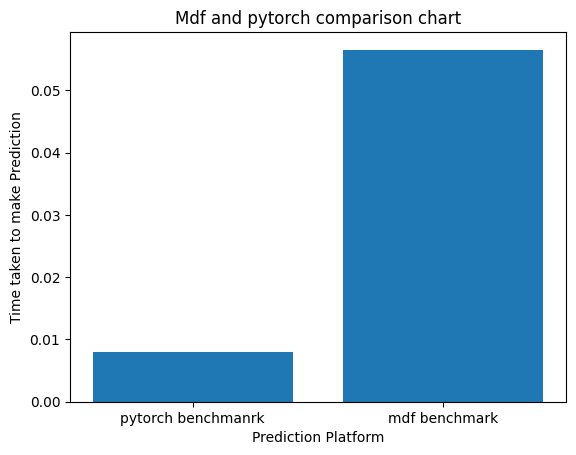

In [60]:
# Prepare the data for the bar plot
data = [pytorch_total_time, mdf_total_time]
labels = ["pytorch benchmanrk", "mdf benchmark"]

# Create a bar plot
plt.bar(labels, data)

# Add labels and title to the plot
plt.xlabel('Prediction Platform')
plt.ylabel('Time taken to make Prediction')
plt.title('Mdf and pytorch comparison chart')

# Display the plot
plt.show()